### Reading of ungridded observation datasets in pyaerocom


#### Primer on observation datasets

- Observation data is often provided ungridded in the form of ASCII text files that contain both the data and relevant metadata. 
- In ***pyaerocom*** such datasets are referred to as ***ungridded data*** since it is sparse observations at different locations and at different times.
- The format of the files can be very different between different observation networks but is usually the same for all data files that belong to one network.
- The data files are often provided ***per station***, that is, **one data file** contains data (i.e. time-series data of one or more variables and metadata such as *station name, latitude, longitude, altitude, PI* **from a single station**
   - Other than model data (which often follows certain file standards, e.g. NetCDF files and naming conventions, e.g. [CF-conventions](http://cfconventions.org/)
- For some databases, there is exactly one file per station (containing all available data from that station). This is the case in the example dataset shown below (Aeronet Sun version 3 level2 daily data). However, the general case is that there may be more than one file per station (the [EBAS](http://ebas.nilu.no/) database is such an example, where there can be multiple data files per station, [see this notebook](https://pyaerocom.met.no/tutorials.html#merging-of-several-stationdata-objects-into-one) for an example of how complicated it may get).


#### Data access

Both the model and the observation datasets related to the AeroCom project are stored on internal servers at the Norwegian Meteorological Institute (METNO). On import, pyaerocom automatically checks if it can access the METNO servers containing the data.

The data directory of each dataset can be accessed via an *unique ID* for the dataset. These ID's can be a little cryptic sometimes and parts of this tutorial show, how to find the data you search for, regardless whether you know the exact pyaerocom ID or not.

For instance, below we are going to work with AERONET Sun photometer data, using the version 3, level 2 daily data product. The corresponding ID for this dataset in pyaerocom is ***AeronetSunV3Lev2.daily***.

#### **NOTE**

**This notebook requires access to the AeroCom database and will not work if you do not have access to the AeroCom servers at METNO**

#### More info about pyaerocom

- Website and code documentation (API): https://pyaerocom.met.no/
- GitHub: https://github.com/metno/pyaerocom

#### If you run into problems

Please [create an issue](https://github.com/metno/pyaerocom/issues) if you run into problems or have suggestions for improvements.

#### Reading of and investigating Aeronet Sun AODs (version 3, level 2 data)

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration


Checking database access...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.016 s


Check version of pyaerocom:

In [2]:
pya.__version__ #0.8.0.dev6

'0.8.0.dev28'

#### Search data ID for Aeronet Sun version 2 level 2, daily data

The `browse_database` method helps you to find model or observation datasets.

In [3]:
pya.browse_database('Aeronet*Sun*V3*')


Dataset name: AeronetSunV3Lev1.5.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev1.5.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190425

Dataset name: AeronetSunV3Lev1.5.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev1.5.AP/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190511

Dataset name: AeronetSunV3Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190425

Dataset name: AeronetSunV3Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.AP/renamed
Supported variables

You can see that there are three matches that can be read. The attribute `dataset_name` specifies the ID that we are looking for that is required to read the data.

Below, we are interested in the following dataset: 

In [4]:
DATA_ID = 'AeronetSunV3Lev2.daily'

#### Pick one (or more) variable(s) of interest

From the output above, you can also see which variables the individual datasets provide. The variable names follow
AeroCom conventions and you can find more information (e.g. CF standard names) about each variable [here](https://pyaerocom.met.no/config_files.html#variables).

In the following we will import the aerosol optical depth data at 550 nm (`od550aer`)

In [5]:
VAR_TO_READ = 'od550aer' # you can also use a list of supported variables if you like, e.g. (od550aer, od440aer)

#### Read the AODs from the whole database (all available stations / times) using the ReadUngridded class

Since the dataformats are usually specific for each observation dataset / network, each supported dataset has it's own reading routine in pyaerocom. The individual reading routines can be found in the `pyaerocom.io` module. For instance, the class

In [6]:
pya.io.ReadAeronetSunV3

pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3

contains the reading methods for the Aeronet Sun version 3 dataset that we are interested in. 

However in order to make life easier for everyone, all implemented *individual reading routines* for *each individual dataset* are registered in the [ReadUngridded](https://pyaerocom.met.no/api.html?highlight=readungridded#pyaerocom.io.readungridded.ReadUngridded) factory class, which has registered these *individual reading routines* (this works, becuase the invididual reading routines are all based on the same API [template](https://pyaerocom.met.no/api.html?highlight=readungridded#pyaerocom.io.readungriddedbase.ReadUngriddedBase)). 

Here, *registered* means, that the *dataset ID* of one network is linked with the corresponding reading class.

Having said that, it means that calling

```python
data = pya.io.ReadAeronetSunV3(vars_to_read='od550aer')
```

will give you exactly the same result as calling:

```python
data = pya.io.ReadUngridded(dataset_to_read='AeronetSunV3Lev2.daily',
                            vars_to_read='od550aer')
```

The returned data object is an instance of the [UngriddedData](https://pyaerocom.met.no/api.html?highlight=ungriddeddata#pyaerocom.ungriddeddata.UngriddedData) class which is the pyaerocom standard object for ungridded data and which is designed to hold a whole dataset of observation records (i.e. data from all stations).

#### Create instance of ReadUngridded class

In [7]:
reader = pya.io.ReadUngridded(DATA_ID)
print(reader)


Dataset name: AeronetSunV3Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190425


You may also check, which other datasets are supported by the `ReadUngridded` class:

In [8]:
reader.supported_datasets

['AeronetInvV3Lev2.daily',
 'AeronetInvV3Lev1.5.daily',
 'AeronetInvV2Lev2.daily',
 'AeronetInvV2Lev1.5.daily',
 'AeronetSDAV2Lev2.daily',
 'AeronetSDAV3Lev1.5.daily',
 'AeronetSDAV3Lev2.daily',
 'AeronetSunV2Lev2.daily',
 'AeronetSunV2Lev2.AP',
 'AeronetSunV3Lev1.5.daily',
 'AeronetSunV3Lev1.5.AP',
 'AeronetSunV3Lev2.daily',
 'AeronetSunV3Lev2.AP',
 'EARLINET',
 'EBASMC',
 'DMS_AMS_CVO',
 'GAWTADsubsetAasEtAl']

#### Read the dataset 

The `read` method loops over all files that exist for this dataset and reads them into one data object (`data`) which contains the whole dataset.

**NOTE**: this can take a while as it has to read ~1000 files.

In [9]:
data = reader.read(vars_to_retrieve=VAR_TO_READ)
print(data)

Found Cache match for AeronetSunV3Lev2.daily



Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['od550aer']
Contains instruments: ['sun_photometer']
Total no. of meta-blocks: 1214


That's it! That is all that is required to import an ungridded dataset. 

The data object that is returned by the ```read``` method is an instance of the [pyaerocom.UngriddedData](https://pyaerocom.met.no/api.html?highlight=ungriddeddata#pyaerocom.ungriddeddata.UngriddedData) class. 

The `UngriddedData` object provides an interface that can be used to work with the data and further analyse it.

From the output above, you can see that this datasets contains 1199 *meta-blocks*, that is, one meta block per data file that was read. Since for this database, each station has exactly one datafile, this means that each meta-block corresponds to one station. 

The next tutorial is based on this tutorial and will introduce the `UngriddedData` class and furthermore, the `StationData` class.

However, before ending this tutorial without a plot, let's have a glimpse at the features of the `UngriddedData` object that we just created:

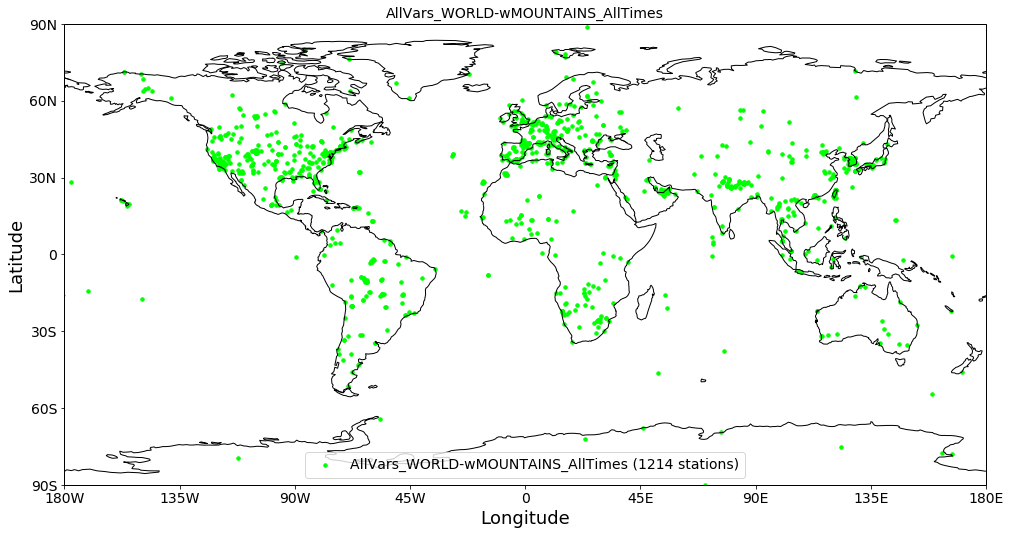

In [10]:
data.plot_station_coordinates(markersize=12, color='lime');

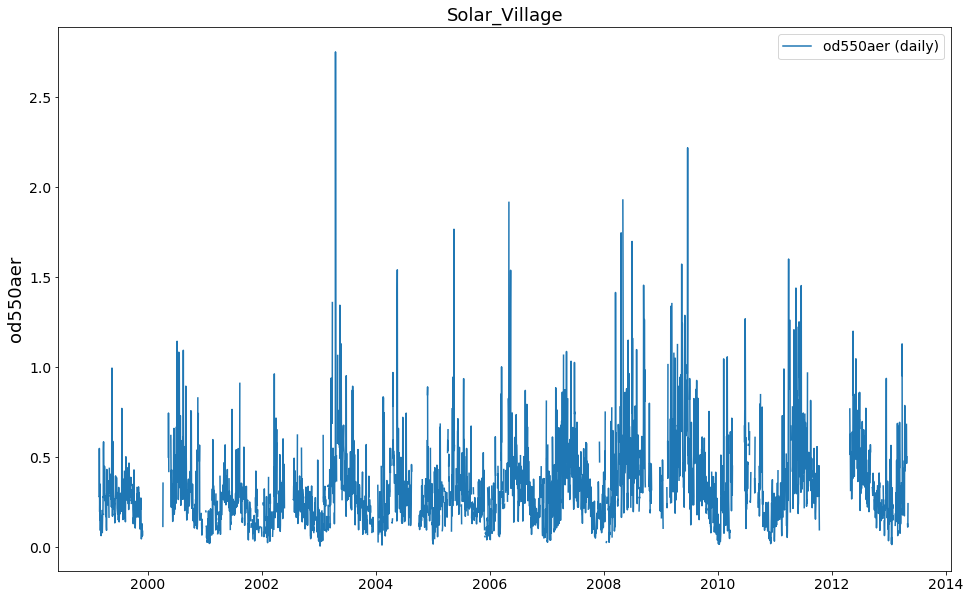

In [11]:
data.plot_station_timeseries('Solar*', 'od550aer');

Finally, store the data object so that it can be used in the next tutorial:

In [12]:
%store data

Stored 'data' (UngriddedData)
